# Trying different gradient descent algorithms

I define a simple function $f(x, y) = x^2 + 3 y^2 + x$

and I want to find its minimum using four optimization methods: vanilla gradient descent, momentum, RMSProp, and Adam.

Comparing these helps illustrate how different update rules behave when minimizing a function which is directly relevant to machine learning, where we minimize loss functions during training.

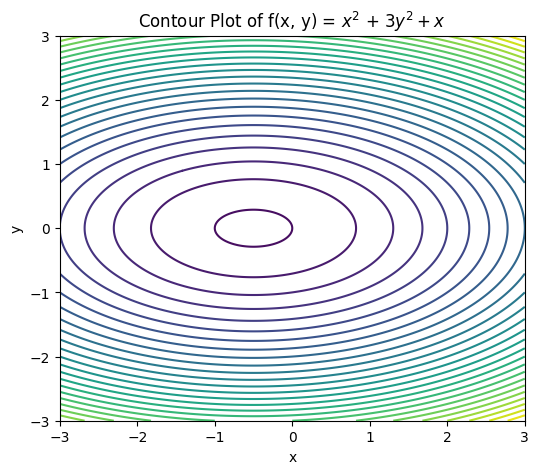

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 + 3*y**2 + x

# Create grid
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot contour
plt.figure(figsize=(6, 5))
plt.contour(X, Y, Z, levels=30)
plt.title("Contour Plot of f(x, y) = $x^2$ + $3y^2 + x$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Gradient Descent

Simply step into the direction of the negative gradient (=down a slope)

This is effective for smooth functions.

Likely to get stuck in local optima, unstable for and slow for unsmooth

In [2]:
def grad_f(x, y):
    return np.array([2*x+1, 6*y])

lr = 0.05
steps = 40
point = np.array([2.5, 2.0])  # initial point inside [-3,3] range

trajectory = [point.copy()]

for _ in range(steps):
    g = grad_f(point[0], point[1])
    point = point - lr * g
    trajectory.append(point.copy())

trajectory = np.array(trajectory)

In [3]:
# Make a GIF

import io
import imageio.v2 as imageio

frames = []

for i in range(len(trajectory)):
    fig, ax = plt.subplots(figsize=(6, 5))

    # contour
    ax.contour(X, Y, Z, levels=20)

    # trajectory so far
    ax.plot(trajectory[:i+1, 0], trajectory[:i+1, 1], marker="o")
    ax.scatter(trajectory[i,0], trajectory[i,1], s=80)

    ax.set_title("Gradient Descent on f(x,y) = $x^2 + 3y^2 + x$")
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

    # ---- SAVE FRAME TO MEMORY BUFFER ----
    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    buf.seek(0)

    # convert buffer → image array
    frame = imageio.imread(buf)
    frames.append(frame)

    plt.close(fig)

# save GIF
imageio.mimsave("./visuals/gd.gif", frames, fps=5)
print("Saved gd.gif")

Saved gd.gif


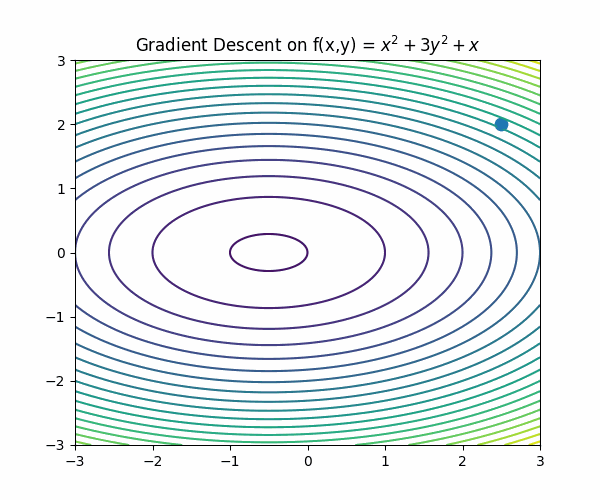

In [4]:
from IPython.display import Image

Image(filename="./visuals/gd.gif")

### Momentum

Momentum speeds up gradient descent by accumulating past gradients into a velocity term. This reduces oscillation and helps the optimizer move faster along consistent descent directions.

Can "skip" over local minima because of the built up momentum

In [59]:
def grad_f(x, y):
    return np.array([2*x+1, 6*y])

lr = 0.05
steps = 40
point = np.array([2.5, 2.0])

# momentum variables
beta = 0.8
v = np.array([0, 0])

trajectory_momentum = [point.copy()]

for _ in range(steps):
    g = grad_f(point[0], point[1])
    
    v = beta * v + (1 - beta) * g # added velocity
    
    point = point - lr * v
    trajectory_momentum.append(point.copy())

trajectory_momentum = np.array(trajectory_momentum)

In [60]:
frames_momentum = []

for i in range(len(trajectory_momentum)):
    fig, ax = plt.subplots(figsize=(6, 5))

    # contour
    ax.contour(X, Y, Z, levels=20)

    # trajectory so far
    ax.plot(trajectory_momentum[:i+1, 0], trajectory_momentum[:i+1, 1], marker="o")
    ax.scatter(trajectory_momentum[i,0], trajectory_momentum[i,1], s=80)

    ax.set_title("GD with momentum on f(x,y) = $x^2 + 3y^2 + x$")
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

    # ---- SAVE FRAME TO MEMORY BUFFER ----
    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    buf.seek(0)

    # convert buffer → image array
    frame = imageio.imread(buf)
    frames_momentum.append(frame)

    plt.close(fig)

# save GIF
imageio.mimsave("./visuals/momentum.gif", frames_momentum, fps=5)
print("Saved momentum.gif")

Saved momentum.gif


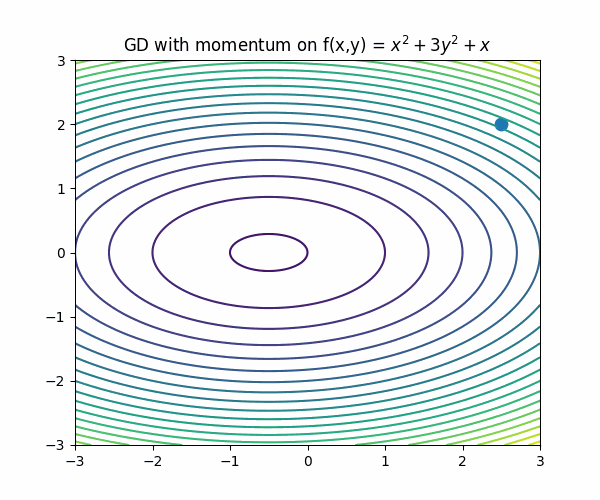

In [61]:
from IPython.display import Image

Image(filename="./visuals/momentum.gif")

### RMSProp

RMSProp adapts the learning rate for each parameter by keeping a moving average of squared gradients. This helps the optimizer take smaller steps in steep directions and larger steps in flat ones, improving stability on poorly conditioned problems.

In [13]:
lr = 0.15
steps = 40
point = np.array([2.5, 2.0])

# rmsprop variables
beta = 0.9
s = np.array([0, 0])
eps = 1e-8

trajectory_rmsprop = [point.copy()]

for _ in range(steps):
    g = grad_f(point[0], point[1])
    
    s = beta * s + (1 - beta) * (g * g)
    point = point - lr * g / (np.sqrt(s) + eps)

    trajectory_rmsprop.append(point.copy())

trajectory_rmsprop = np.array(trajectory_rmsprop)

In [14]:
frames_rmsprop = []

for i in range(len(trajectory_rmsprop)):
    fig, ax = plt.subplots(figsize=(6, 5))

    # contour
    ax.contour(X, Y, Z, levels=20)

    # trajectory so far
    ax.plot(trajectory_rmsprop[:i+1, 0], trajectory_rmsprop[:i+1, 1], marker="o")
    ax.scatter(trajectory_rmsprop[i,0], trajectory_rmsprop[i,1], s=80)

    ax.set_title("RMSProp f(x,y) = $x^2 + 3y^2 + x$")
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

    # ---- SAVE FRAME TO MEMORY BUFFER ----
    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    buf.seek(0)

    # convert buffer → image array
    frame = imageio.imread(buf)
    frames_rmsprop.append(frame)

    plt.close(fig)

# save GIF
imageio.mimsave("./visuals/RMSProp.gif", frames_rmsprop, fps=5)
print("Saved RMSProp.gif")

Saved RMSProp.gif


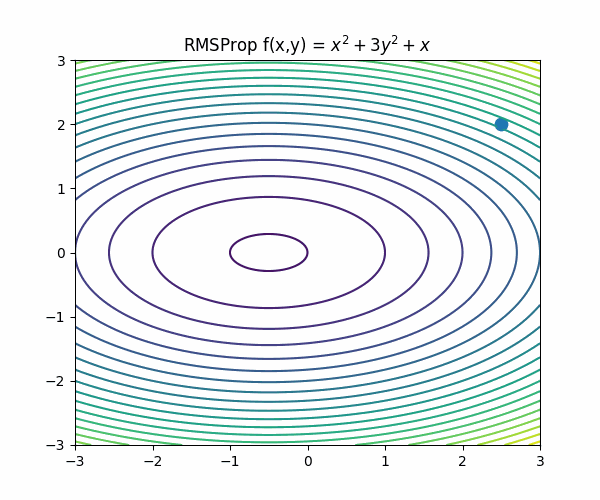

In [15]:
from IPython.display import Image

Image(filename="./visuals/RMSProp.gif")

### Adam

Adam combines momentum (first moment) and RMSProp (second moment). It smooths the gradient like momentum and adapts the step size like RMSProp. This makes Adam robust and fast in high-dimensional or noisy optimization problems.

In [55]:
lr = 0.7
steps = 60
point = np.array([2.5, 2.0])

# adam variables
m = np.array([0, 0])
v = np.array([0, 0])
beta1 = 0.9
beta2 = 0.997
epsilon = 1e-8


trajectory_adam = [point.copy()]

for t in range(1, steps+1):
    g = grad_f(point[0], point[1])

    m = beta1 * m + (1-beta1) * g
    
    s = beta2 * s + (1 - beta2) * (g * g)

    m_hat = m / (1 - beta1**t)
    s_hat = s / (1 - beta2**t)

    point = point - lr * m_hat / (np.sqrt(s_hat) + eps)

    trajectory_adam.append(point.copy())

trajectory_adam = np.array(trajectory_adam)

In [56]:
frames_adam = []

for i in range(len(trajectory_adam)):
    fig, ax = plt.subplots(figsize=(6, 5))

    # contour
    ax.contour(X, Y, Z, levels=20)

    # trajectory so far
    ax.plot(trajectory_adam[:i+1, 0], trajectory_adam[:i+1, 1], marker="o")
    ax.scatter(trajectory_adam[i,0], trajectory_adam[i,1], s=80)

    ax.set_title("Adam f(x,y) = $x^2 + 3y^2 + x$")
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

    # ---- SAVE FRAME TO MEMORY BUFFER ----
    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    buf.seek(0)

    # convert buffer → image array
    frame = imageio.imread(buf)
    frames_adam.append(frame)

    plt.close(fig)

# save GIF
imageio.mimsave("./visuals/Adam.gif", frames_adam, fps=5)
print("Saved Adam.gif")

Saved Adam.gif


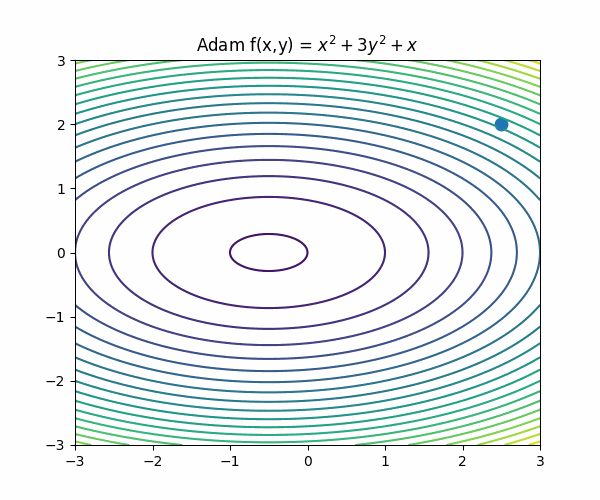

In [58]:
from IPython.display import Image

Image(filename="./visuals/Adam.gif")

### Conclusion

Each optimizer improves on gradient descent by addressing different limitations: momentum accelerates convergence, RMSProp adapts learning rates, and Adam blends both ideas for more stable and efficient training.

- GD gives basic downhill steps,

- Momentum accelerates learning,

- RMSProp adapts step sizes, and

- Adam blends both Momentum and RMSProp into a widely effective optimizer.

On simple functions (like the one in my example) the difference may be small, but in machine learning Adam often provides the most robust and efficient training.